###### 2_dbscan_clustering.ipynb

## 디비스캔 (DBSCAN)
- 밀도 기반 군집 알고리즘
- 입실론 반경과 최소 포인트를 매개변수로 사용하여 군집을 정의
- 노이즈(이상치)를 자동으로 분류

* --- dbscan 결과 --- *
labels : [ 0  0  0  0  1  1  1  1 -1]


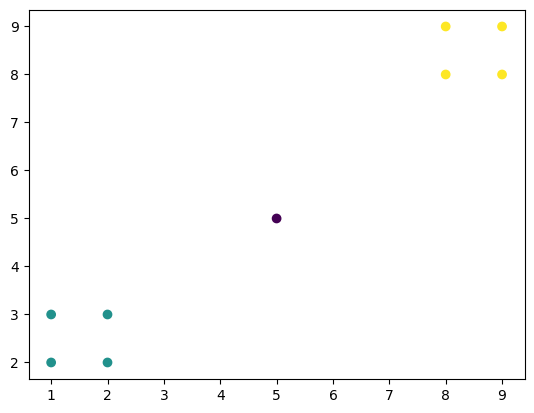

In [ ]:
import numpy as np

# 샘플데이터
x = np.array([
  [1,2], [1,3], [2,2], [2,3],     # Cluster 1
  [8,8], [8,9], [9,8], [9,9],     # Cluster 2
  [5,5]                           # Noise (고립점)
])

# 모델
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=3)
# * eps : 반경 (이웃을 찾을 거리)
#         한 점을 중심으로 해당 거리 안에 있는 점들을 이웃으로 간주
#   - 기본 가이드라인 (참고)
#     + 2D 저차원 : 0.3 ~ 1.0
#     + 5D ~ 10D  : 1.0 ~ 5.0
#     + 10D 이상 고차원 : 5.0 이상
#  => 데이터 분포와 스케일에 따라 달라짐!

# * min_samples : 핵심점 판단을 위한 최소 포인트 수
#                 한 점이 핵심점이 되려면 주변 eps 반경 안에 min_samples 이상의 점이 있어야 함
#   - 기본 가이드라인 (참고)
#     + 저차원 : 3 ~ 5
#     + 고차원 : 차원수 + 1

# 학습 및 결과 추출
labels = dbscan.fit_predict(x)
print('* --- dbscan 결과 --- *')
print(f'labels : {labels}')
# => 군집 종류 중 -1은 노이즈(고립점)을 의미함.

# 시각화
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=labels)

* --- moons datasets --- *
labels: [0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1]
 DBSCAN이 발견한 군집 수 : 2 


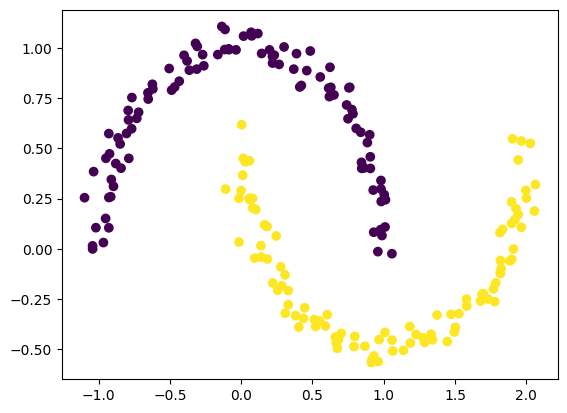

In [6]:
# 가상 데이터셋
from sklearn.datasets import make_moons     # 반달 모양의 비선형 군집 데이터 생성

x, y = make_moons(n_samples=200, noise=0.05, random_state=42)
# * n_samples : 데이터 수 (포인트 개수)
# * noise : 노이즈 추가. 포인트들이 너무 규칙적이지 않게 하기 위해 설정
# => K-Means 알고리즘은 직선 기반 거리로 군집화하기 때문에 제대로 분류하기 어려운 데이터 형태

# 모델 학습 -> 반경 0.3, 최소 데이터 수 5
model = DBSCAN(eps=0.3, min_samples=5)

# 학습
model.fit(x)

# 결과 추출
labels = model.labels_
print('* --- moons datasets --- *')
print(f'labels: {labels}')
# labels = model.fit_predict(x)

# 노이즈를 제외한 군집 수 계산
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# * 값1 if 조건식 else 값2
#   => 조건식이 True인 경우 값1 사용, 그렇지 않으면(False) 값2 사용
# * in 연산자 
#   => 값 in 리스트/문자열 : 리스트 내에 값이 존재하는 경우 True, 그렇지 않으면 False
# n_clusters
print(f' DBSCAN이 발견한 군집 수 : {n_clusters} ')

# 시각화
plt.scatter(x[:, 0], x[:, 1], c=labels)

In [ ]:
# 와인 데이터셋 (wine)
from sklearn.datasets import load_wine

# 데이터 로드 (DataFrame)
wine = load_wine(as_frame=True)

# df = wine.frame
# df
x = wine.data
y = wine.target        # 비교용으로 사용 (라벨)

# 통계 요약 정보 확인
x.describe().loc[['min', 'max']]
# => Feature(특징) 간 범위가 10배 이상 차이나는 경우,
#    스케일링 작업을 해주는 것이 좋음!
#    color_intensity 범위 12정도, proline 범위 1400 정도 => 이 두개의 특징 차이가 100배 차이남..

# * 표준 스케일링 처리 *
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_s = scaler.fit_transform(x)

x_s

# 모델 학습
model = DBSCAN(eps=1.2, min_samples=3)
labels = model.fit_predict(x_s)

labels
# => 모두 -1 이라는 건 어떤 점도 핵심 포인트(core point)가 되지 못했다는 의미! (노이즈)
#    즉, 주어진 eps 반경 안에 min_samples개 이상의 이웃이 존재하지 않았다는 뜻
#    적절한 eps값을 설정해줘야 함.. -> k-distance 플롯을 활용하여 적절한 eps 후보를 찾아야함!

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

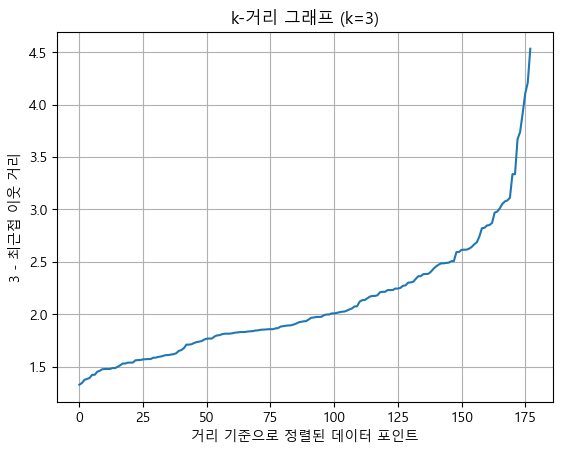

In [ ]:
min_samples = 3

# 최근접 이웃 계산 방식
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=min_samples).fit(x_s)

# 거리 정보와 인덱스 정보 조회
distances, indices = nbrs.kneighbors(x_s)
# - distances : 각 샘플별 min_samples개의 이웃까지의 거리
# - indices : 각 샘플별 min_samples개의 이웃 인덱스

distances

# 각 점에서 k(min_samples)번째 거리만 뽑아 정렬
k_distances = np.sort(distances[:, -1]) 

# k-distance 시각화
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(k_distances)

plt.title(f"k-거리 그래프 (k={min_samples})")
plt.xlabel("거리 기준으로 정렬된 데이터 포인트")
plt.ylabel(f"{min_samples} - 최근접 이웃 거리")
plt.grid(True)
#  => 그래프에서 급격히 꺾이는 지점(엘보우, elbow)을 eps 후보로 봄!
# 현재 그래프의 y축 기준으로 2.5 ~ 3.5(4.0) 사이의 지점이 급격히 꺾임(elbow)

In [26]:
# DBSCAN 모델 생성 및 학습 -> 결과 확인
model = DBSCAN(eps=3.6, min_samples=3)
labels = model.fit_predict(x_s)

labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

 발견한 군집 수 : 2


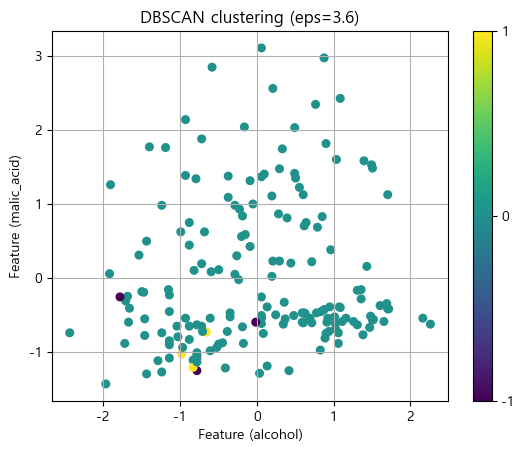

In [33]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f' 발견한 군집 수 : {n_clusters}')

# 시각화
sct = plt.scatter(x_s[:, 0], x_s[:, 1], c=labels, s=30)
plt.colorbar(sct, ticks=list(set(labels)))

plt.title(f"DBSCAN clustering (eps={model.eps})")
plt.xlabel(f"Feature ({x.columns[0]})")
plt.ylabel(f"Feature ({x.columns[1]})")
plt.grid(True)